Epoch 1/100
27/27 [==============================] - 4s 50ms/step - loss: 13200.2910 - mae: 13200.2910 - mse: 320533696.0000 - val_loss: 13262.7422 - val_mae: 13262.7422 - val_mse: 314132224.0000
Epoch 2/100
27/27 [==============================] - 0s 18ms/step - loss: 13197.2080 - mae: 13197.2080 - mse: 320446880.0000 - val_loss: 13257.9824 - val_mae: 13257.9824 - val_mse: 314000672.0000
Epoch 3/100
27/27 [==============================] - 0s 15ms/step - loss: 13190.3564 - mae: 13190.3564 - mse: 320261632.0000 - val_loss: 13247.9277 - val_mae: 13247.9277 - val_mse: 313724928.0000
Epoch 4/100
27/27 [==============================] - 0s 9ms/step - loss: 13177.0293 - mae: 13177.0293 - mse: 319893792.0000 - val_loss: 13229.9121 - val_mae: 13229.9121 - val_mse: 313238848.0000
Epoch 5/100
27/27 [==============================] - 0s 9ms/step - loss: 13154.4238 - mae: 13154.4238 - mse: 319291424.0000 - val_loss: 13200.6846 - val_mae: 13200.6846 - val_mse: 312452800.0000
Epoch 6/100
27/27 [===

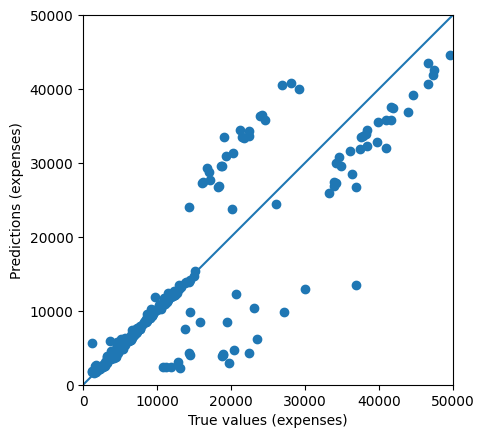

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


# Download the dataset using requests
url = 'https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv'    # link to the dataset
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})     #download via request.get();  need to open it here because I can't use it directly from the website; Setting the User-Agent bypasses the 403 Forbidden error.
with open('insurance.csv', 'wb') as file:           # saving the file as insurance.csv
    file.write(response.content)                    # save the content of the downloaded file to local storage.

# Load the dataset
dataset = pd.read_csv('insurance.csv')               # load data into pandas DataFrame
dataset.tail()                                       # display last 5 entries (to see that it is loaded correctly)

# using map to convert categorical data to numbers
dataset['sex'] = dataset['sex'].map({'male': 0, 'female': 1})        # column "sex" from dataframe: replaces male with 0 and female with 1
dataset['smoker'] = dataset['smoker'].map({'no': 0, 'yes': 1})       # column "smoker": replaces no with 0 and yes with 1
dataset['region'] = dataset['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})    # column "region": replaces words with corresponding numbers (0-3)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(dataset))      # train_size is an integer equal to 80% of the dataset length
train_dataset = dataset[:train_size]      # train_dataset is the dataset from begining to the size of train_size
test_dataset = dataset[train_size:]       # the remaining datat is in test_dataset

# Pop off the "expenses" column to create labels
train_labels = train_dataset.pop('expenses').values     # remove (pop) expenses for train_dataset
test_labels = test_dataset.pop('expenses').values       # likewise for test_dataset

# Normalize the data manually - # operating down the columns (axis = 0)
train_mean = train_dataset.mean(axis=0)                           # returns a series with the mean for each feature/column (age, bmi, children, etc.)                 
train_std = train_dataset.std(axis=0)                             # same as above, but now giving standard deviation
train_dataset = (train_dataset - train_mean) / train_std          # dividing the values of mean with std_dev (standardised z-score)
test_dataset = (test_dataset - train_mean) / train_std

# Using .values to convert a dataframe into a NumPy array (needed to be in this format for tensorflow)
train_dataset = train_dataset.values
test_dataset = test_dataset.values

# Build the model
def build_model():                                                                       # creating the build_model function
    model = keras.Sequential([                                                           # with keras.Sequential layering
        layers.Dense(64, activation='relu', input_shape=[train_dataset.shape[1]]),       # dense (fully connected) layer, with 64 neurons, ReLU activation, and train_dataset.shape[x] gets the x number of input features (columns) in the training data (just 1 here)
        layers.Dense(64, activation='relu'),                                             # another dense layer with ReLU activation (outputs max(0, input), meaning if input is positive, it stays the same; otherwise, it is zero)
        layers.Dense(1)                                                                  # last layer, also fully connected, with only 1 neuron
    ])
    model.compile(optimizer='adam', loss='mae', metrics=['mae', 'mse'])                  # compile the model with adam optimiser, loss of mean absolute error, and metrics of mean absolute error and mean squared error
    return model                                                                         # output "model"

model_1 = build_model()    #calling this model_1 so as to not confuse it with the model within the build model

# Train the model using Keras "fit" (used for training models)
history = model_1.fit(   
    train_dataset, train_labels,         # datasets being used (always train dataset and train labels)
    epochs=100,                          # 100 epochs
    validation_split=0.2,               # 20% to be used for validation
    verbose=1                           # control how much info is shown on screen
)

# Evaluate the model
loss, mae, mse = model_1.evaluate(test_dataset, test_labels, verbose=2)     # 3 outputs from test dataset, and label (verbose is the amount of info seen onscreen)
print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))           # print out the sentence seen

if mae < 3500:                                                              # for mean absolute error below or above 3500, print the below
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions
test_predictions = model_1.predict(test_dataset).flatten()              # use predict on the test dataset (output results are a 1D vector using "flatten")

a = plt.axes(aspect='equal')                                           # use the given code to plot results  
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)